<a href="https://colab.research.google.com/github/TrzeciakPiotr2300/Uczenie_Maszynowe_2025/blob/main/HW04_penalized-regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Analyzing and Plotting Bias in Penalized Regression**

-------------------------------

In this assignment, you will explore how **Ridge** and **Lasso** regression introduce **bias** into a model to reduce **variance**, and how the choice of the regularization parameter $\lambda$ affects this trade-off. The goal is to visualize and analyze the **bias-variance trade-off** and understand the conditions under which penalization helps or hinders model performance.

## **The Question**

**How does varying the regularization parameter $\lambda$ in Ridge and Lasso regression impact the trade-off between bias and variance?**

- Generate a synthetic dataset based on a **known** linear relationship:
  
  $$
  y = \beta_0 + \beta_1 x + \ldots + \epsilon
  $$

  where $$\epsilon \sim \mathcal{N}(0, \sigma^2),$$

  use a **high-dimensional** setting (e.g., 50 predictors) with only a few non-zero true coefficients to emphasize the effects of regularization. I stress, the $\beta_i$ coefficients should be known for this experiment and they should be mostly 0, with only a few non-zero parameters.

- Investigate how increasing $\lambda$ influences the model’s **bias**, **variance**, and **Mean Squared Error (MSE)**.
- Plot **Bias²**, **Variance**, and **MSE** on a single graph for both Ridge and Lasso models.
- Explain MSE decomposition into bias and variance. Read more on the MSE decomposition if you need to.

**Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.**




**Expected Outcome:**
 - As $\lambda$ increases:
   - **Bias** increases (the model becomes too simple).
   - **Variance** decreases (the model becomes more stable).
   - **MSE** forms a **U-shape**, revealing the optimal trade-off.

- Analyze how **Ridge** and **Lasso** differ in terms of their bias-variance trade-offs.
- Discuss situations where one method may outperform the other, considering factors like **feature sparsity** and **multicollinearity**.


## **Colab Notebook Requirements**
- Your **Colab notebook** should:
  - Simulate the synthetic dataset and apply Ridge and Lasso regression.
  - Plot **Bias²**, **Variance**, and **MSE** against $\lambda$ for both models.
  - Include a section answering the questions.
  - Be well-documented with comments and explanations for each step.


## **Publish on GitHub**
- Upload your Colab notebook to your **GitHub repository** for this course.
- In your repository’s **README**, include a **link** to the notebook.
- In the notebook include **“Open in Colab”** badge so the notebook can be launched directly from GitHub.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso
import warnings
warnings.filterwarnings("ignore")

# Step 1: Generate synthetic data (generate random variables and set parameters)
np.random.seed(42)
n_features = 150
n_nonzero = 5
beta = np.zeros(n_features)
beta[:n_nonzero] = np.arange(1,n_nonzero+1,1)  # Non-zero coefficients

# Test set
n_test = 200
X_test = np.random.normal(0, 1, (n_test, n_features))
f_test = X_test @ beta  # True values without noise

# Parameters
n_train = 100
sigma = 1
n_trials = 100
lambdas = np.logspace(-3, 3, 100)  # Geometric scale for λ

# Storage
ridge_bias_sq, ridge_var, ridge_mse = [], [], []
lasso_bias_sq, lasso_var, lasso_mse = [], [], []

# Step 2: Generate multiple models for evaluation for different lambdas
for lam in lambdas:
    ridge_preds = np.zeros((n_trials, n_test))
    lasso_preds = np.zeros((n_trials, n_test))

    for trial in range(n_trials):
        # Training data
        X_train = np.random.normal(0, 1, (n_train, n_features))#unif(-1,1) - consider this distribution as well
        y_train = X_train @ beta + np.random.normal(0, sigma, n_train)

        # Fit models
        ridge = Ridge(alpha=lam, fit_intercept=False, max_iter=50000, tol=1e-6)
        ridge.fit(X_train, y_train)
        ridge_preds[trial] = ridge.predict(X_test)

        lasso = Lasso(alpha=lam, fit_intercept=False, max_iter=50000, tol=1e-6)
        lasso.fit(X_train, y_train)
        lasso_preds[trial] = lasso.predict(X_test)

    # Compute metrics for Ridge
    mean_ridge = np.mean(ridge_preds, axis=0)
    ridge_bias_sq.append(np.mean((mean_ridge - f_test)**2))
    ridge_var.append(np.mean(np.var(ridge_preds, axis=0)))
    ridge_mse.append(np.mean((ridge_preds - f_test)**2))

    # Compute metrics for Lasso
    mean_lasso = np.mean(lasso_preds, axis=0)
    lasso_bias_sq.append(np.mean((mean_lasso - f_test)**2))
    lasso_var.append(np.mean(np.var(lasso_preds, axis=0)))
    lasso_mse.append(np.mean((lasso_preds - f_test)**2))


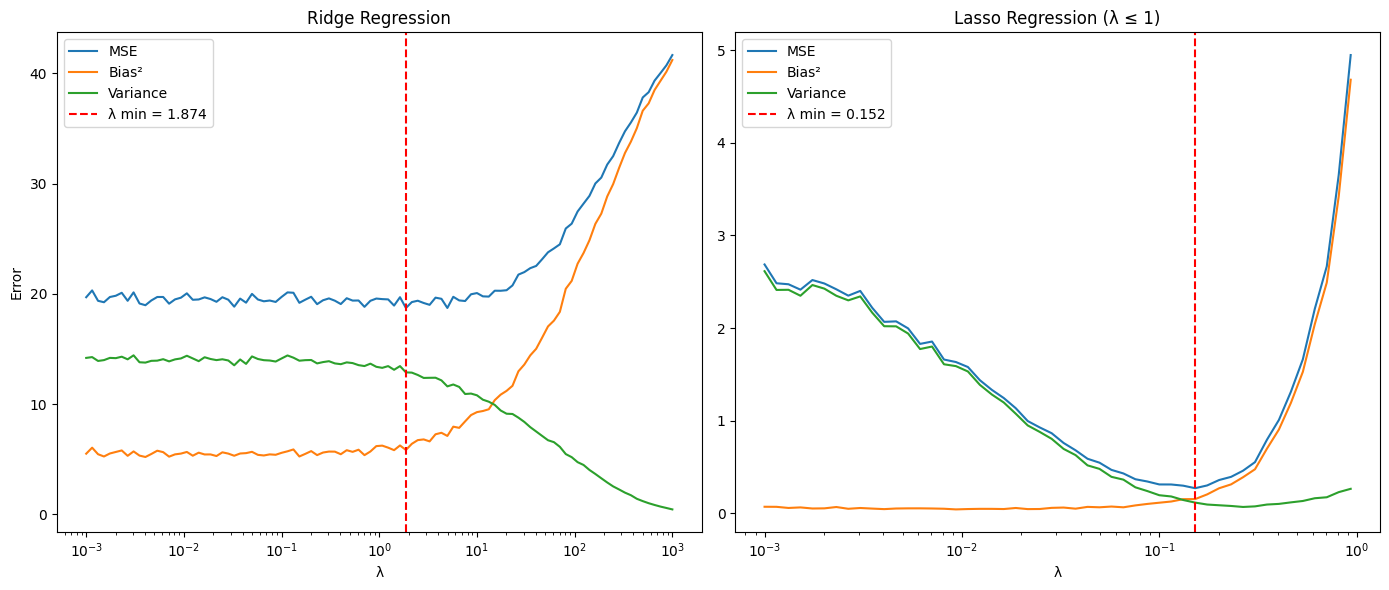

In [ ]:
# Step 3: Plotting the results

# Convert to arrays
lambdas = np.array(lambdas)
ridge_mse = np.array(ridge_mse)
ridge_bias_sq = np.array(ridge_bias_sq)
ridge_var = np.array(ridge_var)
lasso_mse = np.array(lasso_mse)
lasso_bias_sq = np.array(lasso_bias_sq)
lasso_var = np.array(lasso_var)

# Filter for Lasso: only λ ≤ 1 (bigger lasso - bias exploded)
mask_lasso = lambdas <= 1
lambdas_lasso = lambdas[mask_lasso]
lasso_mse_limited = lasso_mse[mask_lasso]
lasso_bias_sq_limited = lasso_bias_sq[mask_lasso]
lasso_var_limited = lasso_var[mask_lasso]

# Find λ that minimizes MSE
lambda_ridge_min = lambdas[np.argmin(ridge_mse)]
lambda_lasso_min = lambdas_lasso[np.argmin(lasso_mse_limited)]  # Within λ ≤ 1 range

# Plotting
plt.figure(figsize=(14, 6))

# Ridge
plt.subplot(1, 2, 1)
plt.semilogx(lambdas, ridge_mse, label='MSE')
plt.semilogx(lambdas, ridge_bias_sq, label='Bias²')
plt.semilogx(lambdas, ridge_var, label='Variance')
plt.axvline(lambda_ridge_min, color='r', linestyle='--', label=f'λ min = {lambda_ridge_min:.3f}')
plt.title('Ridge Regression')
plt.xlabel('λ')
plt.ylabel('Error')
plt.legend()

# Lasso (restricted λ range)
plt.subplot(1, 2, 2)
plt.semilogx(lambdas_lasso, lasso_mse_limited, label='MSE')
plt.semilogx(lambdas_lasso, lasso_bias_sq_limited, label='Bias²')
plt.semilogx(lambdas_lasso, lasso_var_limited, label='Variance')
plt.axvline(lambda_lasso_min, color='r', linestyle='--', label=f'λ min = {lambda_lasso_min:.3f}')
plt.title('Lasso Regression (λ ≤ 1)')
plt.xlabel('λ')
plt.legend()

plt.tight_layout()
plt.show()

# Does the regularization lead to an optimal trade-off point where MSE is minimized? Explain why this point exists.

Yes, regularization leads to an optimal trade-off point where MSE is minimized. This occurs due to the bias-variance trade-off:

̇̇1) Low regularization (small $\lambda$): High variance (overfitting) dominates, increasing test MSE.

2) High regularization (large $\lambda$
): High bias (underfitting) dominates, increasing test MSE.

The optimal $\lambda$ is kind of balancing these effects on test data. It needs to have optimal accuracy but also not too big variance. There exists a point that generalises it best and that's our point lambda.


#Discuss situations where one method may outperform the other, considering factors like feature sparsity and multicollinearity.


# When we have few significant features (feature sparcity)


1) Lasso outperforms Ridge when the true model is sparse (i.e., only a few features contribute significantly). Lasso’s ability to shrink some coefficients to zero makes it effective for feature selection, reducing model complexity and improving interpretability.

2) Ridge performs worse in this case because it shrinks all coefficients proportionally but does not set any of them to zero, meaning it retains irrelevant features.


# Multicollinearity

1) Ridge outperforms Lasso when multicollinearity is present, as it shrinks correlated feature coefficients together, preventing instability in their estimates.

2) Lasso struggles with multicollinearity because it arbitrarily selects one feature from a correlated group while shrinking others to zero, potentially discarding useful information.

# If neither method is perfect

We can consider using lasso methon - which uses L1 and L2 penalties. It therfore balances feature selection AND handles coefficient stability...